<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/Note_06_Exercises_and_Coding_Challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 - In this, we focuses on exercises and demonstrations which came from our studies as observations.
 - This helps to  solidify the concepts of **Part-of-Speech (POS) tagging** and tagger evaluation.



### **Coding Challenges**


#### **Exercise 1: Frequency Distribution of POS Tags**

  - In this exercise, We are tasked with computing the **frequency distribution** of different POS tags in a corpus using NLTK.
  - This exercise shows how to work with tagged corpora, which is essential for evaluating taggers.



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Most common POS tags:
[('NN', 152470), ('IN', 120557), ('AT', 97959), ('JJ', 64028), ('.', 60638), (',', 58156), ('NNS', 55110), ('CC', 37718), ('RB', 36464), ('NP', 34476)]


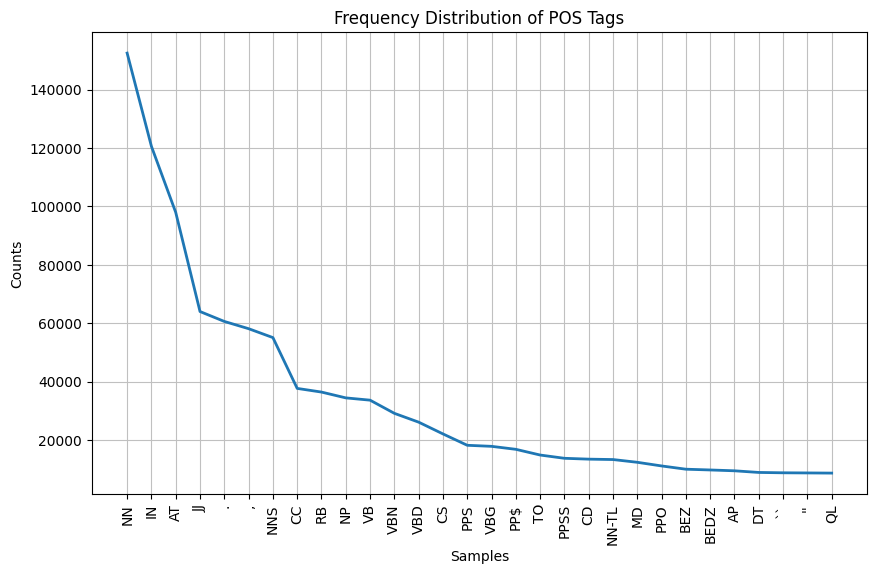

In [16]:
# Import necessary modules from NLTK and matplotlib
import nltk
from nltk.corpus import brown  # We will use the Brown Corpus for this example
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# 1. Downloading and preparing the corpus
# Make sure the Brown Corpus is downloaded
nltk.download('brown')

# Load the tagged words from the Brown Corpus
tagged_words = brown.tagged_words()

# 2. Extracting POS Tags from the tagged words
# The tagged_words list contains tuples of (word, tag).
# We extract only the POS tags to analyze their frequency distribution.
pos_tags = [tag for word, tag in tagged_words]

# 3. Calculating the Frequency Distribution of POS Tags
# We use NLTK's FreqDist to calculate how often each POS tag appears in the corpus.
freq_dist = FreqDist(pos_tags)

# 4. Display the most common POS tags
# Print the top 10 most common POS tags
print("Most common POS tags:")
print(freq_dist.most_common(10))

# 5. Visualizing the POS Tag Distribution
# Now we plot the frequency distribution using matplotlib.
# We will visualize the top 30 POS tags for a clear view.
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
freq_dist.plot(30, title="Frequency Distribution of POS Tags", cumulative=False)
plt.show()


##### **Purpose**:

- This exercise helps to understand the distribution of POS tags in a corpus.
- Such frequency analysis is often the first step in evaluating how well a tagger performs and identifying which tags appear most frequently in the dataset.




#### **Exercise 2: Implementing Backoff Taggers**

 - In this challenge, we implements a sequence of taggers, such as **default**, **unigram**, and **bigram** taggers, and combine them using a **backoff strategy**.
 - The goal is to improve tagging accuracy by using more sophisticated taggers when possible and simpler taggers when more complex models fail.



In [19]:

#============== just to remove warning message
import warnings  # Import warnings module

# Ignore deprecation and resource warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)

#=================

# Import necessary modules from NLTK
import nltk
from nltk.corpus import brown
from nltk import UnigramTagger, BigramTagger, DefaultTagger

# Ensure that NLTK resources are downloaded
nltk.download('brown')  # Download the Brown corpus for training and testing
nltk.download('universal_tagset')  # Download the universal tagset to make tagging easier to evaluate

# Load the Brown Corpus and split into training and testing sets
# The Brown Corpus is a tagged corpus, so it comes pre-tagged with POS tags
corpus = brown.tagged_sents(tagset='universal')

# Split the data into training (80%) and testing (20%)
train_size = int(len(corpus) * 0.8)
train_data = corpus[:train_size]
test_data = corpus[train_size:]

# ---------------------------------------------------------------------
# Step 1: Implementing the Default Tagger
# A default tagger tags every word with a single tag, usually the most frequent one (e.g., noun)
default_tagger = DefaultTagger('NOUN')  # Default tag is 'NOUN'

# Evaluate the accuracy of the default tagger on the test data
default_accuracy = default_tagger.evaluate(test_data)
print(f'Default Tagger Accuracy: {default_accuracy:.4f}')

# ---------------------------------------------------------------------
# Step 2: Implementing the Unigram Tagger with Backoff
# The unigram tagger assigns the most frequent tag for each word, based on the training data.
# If the word has not been seen in training, it backs off to the default tagger.
unigram_tagger = UnigramTagger(train_data, backoff=default_tagger)

# Evaluate the accuracy of the unigram tagger on the test data
unigram_accuracy = unigram_tagger.evaluate(test_data)
print(f'Unigram Tagger Accuracy: {unigram_accuracy:.4f}')

# ---------------------------------------------------------------------
# Step 3: Implementing the Bigram Tagger with Backoff
# The bigram tagger uses the previous word's tag to predict the current word's tag.
# It backs off to the unigram tagger, which in turn backs off to the default tagger.
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)

# Evaluate the accuracy of the bigram tagger on the test data
bigram_accuracy = bigram_tagger.evaluate(test_data)
print(f'Bigram Tagger Accuracy: {bigram_accuracy:.4f}')

# ---------------------------------------------------------------------
# Step 4: Testing the Taggers on New Sentences
# Let's test our backoff taggers on new sentences to observe how they tag unseen text

# Define the sentence to be tagged
new_sentence = "The quick brown fox jumps over the lazy dog".split()

# Tagging the new sentence using the Default Tagger
tagged_sentence_default = default_tagger.tag(new_sentence)
print("\nTagged Sentence (Default Tagger):")
print(tagged_sentence_default)

# Tagging the new sentence using the Unigram Tagger (with backoff to Default Tagger)
tagged_sentence_unigram = unigram_tagger.tag(new_sentence)
print("\nTagged Sentence (Unigram Tagger with backoff to Default Tagger):")
print(tagged_sentence_unigram)

# Tagging the new sentence using the Bigram Tagger (with backoff to Unigram and Default Tagger)
tagged_sentence_bigram = bigram_tagger.tag(new_sentence)
print("\nTagged Sentence (Bigram Tagger with backoff to Unigram and Default Tagger):")
print(tagged_sentence_bigram)


# ---------------------------------------------------------------------
# Step 5: Conclusion and Analysis
# The default tagger is the simplest, assigning a single tag to all words.
# The unigram tagger improves accuracy by learning word-specific tags from the training set.
# The bigram tagger adds context sensitivity by considering the previous word's tag,
# and backs off to the unigram tagger or default tagger when necessary.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Default Tagger Accuracy: 0.1874
Unigram Tagger Accuracy: 0.9366
Bigram Tagger Accuracy: 0.9455

Tagged Sentence (Default Tagger):
[('The', 'NOUN'), ('quick', 'NOUN'), ('brown', 'NOUN'), ('fox', 'NOUN'), ('jumps', 'NOUN'), ('over', 'NOUN'), ('the', 'NOUN'), ('lazy', 'NOUN'), ('dog', 'NOUN')]

Tagged Sentence (Unigram Tagger with backoff to Default Tagger):
[('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'NOUN'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN')]

Tagged Sentence (Bigram Tagger with backoff to Unigram and Default Tagger):
[('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN')]


##### **Observation: Explanation of the output**

Based on the output provided, here's an analysis and explanation for the results of each tagger in the backoff chain:

###### **1. Default Tagger Output**:
  - The **default tagger** assigns every word the tag **'NOUN'**. This is because the default tagger always assigns a single tag (in this case, 'NOUN') to every word, regardless of its context or meaning.
  - This method provides the lowest level of accuracy since it does not differentiate between different parts of speech. It treats all words as nouns, which is clearly incorrect for many words in the sentence, such as "The" (which is a determiner) and "jumps" (which is a verb).

###### **2. Unigram Tagger Output (with backoff to Default Tagger)**:
  - The **unigram tagger** looks at individual words and assigns the most common tag from the training data for each word.
  - Words like **"The"** are now correctly tagged as **'DET'** (determiner), and **"quick"** and **"brown"** are correctly tagged as **'ADJ'** (adjective).
  - However, for words like **"jumps"**, which are ambiguous (it could be a noun or a verb depending on context), the unigram tagger assigns the more frequent tag **'NOUN'**. This is where the unigram tagger can fail, as it does not consider the context of the word in the sentence.
  - For any word that is not in the training data (unseen words), it falls back to the **default tagger**, which tags them as **'NOUN'**.

###### **3. Bigram Tagger Output (with backoff to Unigram and Default Tagger)**:
  - The **bigram tagger** improves accuracy by considering the previous word’s tag when assigning tags. This is why **"jumps"** is now correctly tagged as a **'VERB'** because the bigram tagger understands that after a noun ("fox"), a verb is more likely to appear in this sentence structure.
  - The other tags remain consistent with the unigram tagger, such as **"The"** as **'DET'** and **"quick"** as **'ADJ'**.
  - The bigram tagger uses **backoff to the unigram tagger** when it doesn’t have enough information to make a decision, and the unigram tagger, in turn, backs off to the **default tagger** if it also cannot make a decision.

---

###### **Overall Analysis**:
1. **Default Tagger**: The default tagger is the most basic, tagging all words as nouns. This is the fallback method when other taggers fail.
2. **Unigram Tagger**: The unigram tagger improves significantly over the default tagger by assigning the most likely tag for each word, but it fails when context is important (e.g., for ambiguous words like "jumps").
3. **Bigram Tagger**: The bigram tagger uses context (the tag of the previous word) to assign more accurate tags, especially for words like "jumps" where context is essential for choosing between multiple possible tags.

###### **Conclusion**:
- The backoff mechanism works as expected, improving accuracy step-by-step by using context when available (bigram), falling back to simpler models when necessary (unigram), and ensuring that every word gets a tag (default tagger).


##### **Observation: What is the importance of back off ?**

The **importance of backoff** in POS tagging can be summarized with the following simple points:

1. **Improves Accuracy**: Backoff taggers improve the overall accuracy by combining multiple tagging methods. If a more complex tagger (like a bigram tagger) cannot assign a tag, the model falls back to simpler taggers (like unigram or default taggers) for reliable predictions.

2. **Handles Unseen Words**: Backoff allows the system to handle words it hasn't seen during training. For example, if the unigram tagger can't recognize a word, the system falls back to a default tagger that assigns a general tag (like "NOUN").

3. **Ensures Robustness**: By providing fallback mechanisms, backoff strategies make the model more robust, ensuring it can still function well even when specific patterns are not found in the training data.

4. **Prevents Overfitting**: Backoff reduces the risk of overfitting because the tagger doesn't rely entirely on highly specific data. When the context is unclear or uncommon, it safely reverts to simpler models.

5. **Combines Strengths**: Backoff leverages the strengths of different tagging models. Complex models handle context-sensitive situations, while simpler models take over when data is sparse or uncertain.

In short, **backoff taggers** improve the flexibility and reliability of POS tagging systems by intelligently combining different levels of taggers.

##### **Observation: How backoff mechanism work in simple words**

1. **Tries the Most Specific Tagger First**:  
   - The backoff mechanism starts with the most complex tagger (like a bigram or trigram tagger), which uses context (surrounding words) to make decisions.
   - This tagger is best at handling more difficult or ambiguous cases where context is important.

2. **Falls Back if No Match Found**:  
   - If the complex tagger doesn't recognize a word or can't confidently assign a tag, the system "backs off" to a simpler tagger, like a **unigram tagger**, which looks at individual words rather than context.

3. **Defaults to the Simplest Tagger**:  
   - If even the simpler tagger can't figure out a tag, the system falls back to a **default tagger**, which might assign a general tag (e.g., "NOUN") to any unknown word.

4. **Increases Accuracy by Using Layers**:  
   - Each layer of backoff ensures that if one method fails, the model has a backup plan.
   - This helps improve accuracy because the system doesn't just give up when it encounters unfamiliar or complex words.

5. **Ensures Coverage for All Words**:  
   - By having multiple layers, the backoff mechanism guarantees that every word gets tagged, even if the system isn't completely sure.
   - This makes the system more reliable in real-world usage.


#### **Exercise 3: POS Tagger with Regular Expressions**

- This focuses on creating a **regular expression tagger** that assigns POS tags based on **simple morphological patterns**, such as words ending in "ing" or "ed".
- Regular expression taggers are rule-based and can quickly tag certain categories of words based on their structure.



In [21]:
# Import necessary modules from NLTK (Natural Language Toolkit)
import nltk
from nltk import RegexpTagger
from nltk.corpus import brown

nltk.download('punkt')

# Download necessary corpora (if not already downloaded)
nltk.download('brown')
nltk.download('universal_tagset')

# 1. Load and explore the Brown Corpus
# We're using the Brown Corpus from NLTK as an example corpus to work with.
# This corpus contains tagged text, and we will use it for training and evaluation.

# Extract the tagged sentences from the Brown Corpus in Universal Tagset format
train_data = brown.tagged_sents(categories='news', tagset='universal')
test_data = brown.tagged_sents(categories='editorial', tagset='universal')

# Print a sample sentence from the training data to understand the structure
print(f"Sample sentence (word, tag): {train_data[0]}")

# 2. Define Regular Expression Patterns for POS Tagging
# These are basic regular expressions based on common English language patterns.
# For example, words ending in 'ing' are typically verbs, words ending in 'ly' are adverbs, etc.

# Define the list of regex patterns and their corresponding POS tags
patterns = [
    (r'.*ing$', 'VERB'),  # Words ending in 'ing' are tagged as verbs
    (r'.*ed$', 'VERB'),   # Words ending in 'ed' are tagged as verbs (past tense)
    (r'.*es$', 'VERB'),   # Words ending in 'es' are tagged as third-person singular verbs
    (r'.*\'s$', 'NOUN'),  # Words ending in 's are tagged as possessive nouns
    (r'.*ly$', 'ADV'),    # Words ending in 'ly' are tagged as adverbs
    (r'.*able$', 'ADJ'),  # Words ending in 'able' are tagged as adjectives
    (r'.*ful$', 'ADJ'),   # Words ending in 'ful' are tagged as adjectives
    (r'.*ness$', 'NOUN'), # Words ending in 'ness' are tagged as nouns (typically abstract nouns)
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),  # Numbers are tagged as numerals
    (r'.*', 'NOUN')       # Default case: Any other word is tagged as a noun
]

# 3. Create a Regular Expression Tagger
# We use the patterns defined above to create a RegexpTagger.
# This tagger will assign tags to words based on the regex rules.

# Create the regex-based POS tagger using the defined patterns
regex_tagger = RegexpTagger(patterns)

# 4. Evaluate the Regular Expression Tagger
# Once the tagger is created, we evaluate its performance using a test dataset.
# The evaluation metric used is accuracy, which tells us the percentage of words that were tagged correctly.

# Evaluate the accuracy of the regex tagger on the test data (editorial category)
accuracy = regex_tagger.evaluate(test_data)
print(f"Accuracy of the regex tagger: {accuracy:.4f}")

# 5. Test the Regular Expression Tagger on a Custom Sentence
# We can also apply the tagger to an individual sentence to observe how it performs on unseen data.

# Example sentence for testing the regex tagger
sentence = "The quick brown fox jumps over the lazy dog."

# Tokenize the sentence into individual words
tokenized_sentence = nltk.word_tokenize(sentence)

# Apply the regex-based tagger to the tokenized sentence
tagged_sentence = regex_tagger.tag(tokenized_sentence)
print(f"Tagged sentence: {tagged_sentence}")

# 6. Compare the output with a default tagger
# For comparison purposes, let's use a default tagger that assigns the tag 'NOUN' to every word.

# Create a default tagger that assigns 'NOUN' to all words
default_tagger = nltk.DefaultTagger('NOUN')

# Evaluate the default tagger on the test data
default_accuracy = default_tagger.evaluate(test_data)
print(f"Accuracy of the default tagger: {default_accuracy:.4f}")

# 7. Combine Regular Expression Tagger with Default Tagger using Backoff
# We can also combine the regex tagger with a backoff tagger (in this case, the default tagger).
# This way, if the regex tagger fails to tag a word, the default tagger will handle it.

# Create a backoff chain using the regex tagger and default tagger
backoff_tagger = RegexpTagger(patterns, backoff=default_tagger)

# Evaluate the backoff tagger on the test data
backoff_accuracy = backoff_tagger.evaluate(test_data)
print(f"Accuracy of the regex tagger with backoff: {backoff_accuracy:.4f}")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Sample sentence (word, tag): [('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]
Accuracy of the regex tagger: 0.2945
Tagged sentence: [('The', 'NOUN'), ('quick', 'NOUN'), ('brown', 'NOUN'), ('fox', 'NOUN'), ('jumps', 'NOUN'), ('over', 'NOUN'), ('the', 'NOUN'), ('lazy', 'NOUN'), ('dog', 'NOUN'), ('.', 'NOUN')]
Accuracy of the default tagger: 0.2463
Accuracy of the regex tagger with backoff: 0.2945


###### **Advantages:**

1. **Simplicity and Speed**:
   - The regular expression (regex) tagger is **easy to implement** and understand. It works by matching predefined patterns to assign part-of-speech (POS) tags, making it highly efficient and fast for smaller datasets or applications where speed is crucial.
   - Since it does not require a training phase, the regex tagger can be immediately applied to text without the need for training data or lengthy model preparation.

2. **Rule-Based Flexibility**:
   - Regex taggers allow for **fine-grained control** over tagging. Linguists or developers can manually define rules tailored to specific needs, such as tagging domain-specific jargon or text with consistent morphological patterns.
   - It is highly adaptable to cases where a small set of rules can effectively capture the language patterns, such as texts with fixed formats or specialized language.

3. **Useful in Low-Resource Settings**:
   - Regex-based taggers can be useful for tagging languages or domains that lack **labeled corpora**. For example, in languages with well-defined morphology, regex rules can be crafted to handle word forms, even when large training datasets are unavailable.

4. **Readable and Interpretable**:
   - The logic behind regex taggers is clear and **human-readable**, making them easily interpretable. Users can understand why a word was assigned a particular tag based on the matching rule, which is harder to achieve with more complex machine learning models.


###### **Limitations:**

1. **Limited Contextual Understanding**:
   - Regex taggers rely solely on surface-level word patterns (morphology) and do not consider **context**. For example, the same word can have different parts of speech depending on its role in a sentence (e.g., "run" as a noun or verb), but regex rules cannot resolve such **ambiguity**.
   - Example:
     - *"He is running"* vs. *"The running water"*: The tagger might wrongly tag "running" as a verb in both cases, failing to account for the context.

2. **Fragility in Complex Sentences**:
   - Regex taggers struggle with **complex sentence structures** and word order. While simple patterns like suffixes can help tag basic forms (e.g., words ending in "ly" as adverbs), sentences with subordinate clauses, nested phrases, or irregular structures can confuse the tagger, leading to inaccurate results.
   
3. **Manual Rule Creation**:
   - Creating **comprehensive rules** manually is labor-intensive and difficult to scale for large or diverse datasets. As language complexity increases, so does the number of rules needed to accurately tag the text, making the regex tagger less scalable than probabilistic models like HMMs or neural networks.
   - It requires domain expertise and significant effort to ensure the rules cover all possible linguistic patterns, and even then, the tagger may not generalize well to other corpora or texts.

4. **Low Accuracy for Unseen or Irregular Words**:
   - Regex taggers may have poor performance when faced with **out-of-vocabulary (OOV) words** or irregular forms that do not follow predefined patterns. In real-world applications, words may not conform to neat morphological patterns, causing the tagger to misclassify unknown or irregular terms.
   - The fallback to default tagging (e.g., classifying all unknown words as nouns) can lead to low accuracy, especially in specialized or evolving language domains where new terms frequently arise.

5. **Hard to Maintain**:
   - As the regex tagger grows in complexity (with more rules and exceptions), maintaining and updating it becomes difficult. Adjusting the rules for new cases or domain-specific terms often requires manual tuning, which can lead to **rule conflicts** or unintended consequences.
   - This makes it hard to adapt the regex tagger to rapidly evolving fields or corpora, where new vocabulary or grammatical constructions frequently emerge.


#### **Exercise 4: Hidden Markov Model (HMM) Tagger**

- In this, we implement or use a pre-built **Hidden Markov Model (HMM) Tagger**.
- HMMs are probabilistic models that consider both **emission probabilities** (how likely a word is given a tag) and **transition probabilities** (how likely a tag is given the previous tag), making them more robust for handling context.



In [22]:
# Import necessary libraries
import nltk
from nltk.tag import hmm  # Hidden Markov Model tagger
from nltk.corpus import brown  # Using the Brown Corpus for training and testing

# Download the required NLTK data
nltk.download('brown')
nltk.download('universal_tagset')

# Subsection 1: Preparing the Data
# ----------------------------------------------------------
# We use the Brown corpus in NLTK for training and testing.
# We're using the 'universal' tagset, which is simpler and has only 12 tags.
train_data = brown.tagged_sents(tagset='universal')[:40000]  # First 40k sentences for training
test_data = brown.tagged_sents(tagset='universal')[40000:]   # Remaining for testing

# Subsection 2: Training the HMM Tagger
# ----------------------------------------------------------
# Using NLTK's built-in HMM trainer to train on the training data.
trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = trainer.train(train_data)

# Subsection 3: Testing the HMM Tagger
# ----------------------------------------------------------
# We evaluate the performance of the HMM tagger on the test set.
accuracy = hmm_tagger.evaluate(test_data)
print(f'HMM Tagger Accuracy: {accuracy:.4f}')

# Subsection 4: Tagging a Sample Sentence
# ----------------------------------------------------------
# Tag a simple sample sentence to see how the HMM tagger performs.
sample_sentence = "The quick brown fox jumps over the lazy dog"
tokens = nltk.word_tokenize(sample_sentence)
tagged_sentence = hmm_tagger.tag(tokens)
print("\nTagged sentence:")
print(tagged_sentence)

# Subsection 5: Using the Tagger on Custom Text
# ----------------------------------------------------------
# Now we'll test the HMM tagger on a more complex sentence or custom input.
custom_sentence = "Artificial intelligence is transforming industries worldwide."
custom_tokens = nltk.word_tokenize(custom_sentence)
tagged_custom_sentence = hmm_tagger.tag(custom_tokens)
print("\nTagged custom sentence:")
print(tagged_custom_sentence)

# Subsection 6: Conclusion and Analysis
# ----------------------------------------------------------
# This section prints out the accuracy of the HMM tagger and gives an example of how it tags a sample sentence.
# You can analyze the performance further by inspecting misclassified words or running the tagger on other datasets.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:364: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


HMM Tagger Accuracy: 0.6702

Tagged sentence:
[('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN')]

Tagged custom sentence:
[('Artificial', 'DET'), ('intelligence', 'DET'), ('is', 'DET'), ('transforming', 'DET'), ('industries', 'DET'), ('worldwide', 'DET'), ('.', 'DET')]


### **Explanation of the Output:**

The output shows the results of the **Hidden Markov Model (HMM) tagger** trained on the Brown corpus, and it includes the **tagged sentences** as well as the model's **accuracy**.

#### **1. HMM Tagger Accuracy**
```plaintext
HMM Tagger Accuracy: 0.6702
```
- The tagger achieved an accuracy of **67.02%** on the test set. This accuracy reflects how often the model correctly tagged words in the test sentences compared to their true labels. Although this accuracy is decent for a simple model, improvements could be made with more sophisticated models, larger training data, or better feature engineering.

#### **2. Tagged Sentence: "The quick brown fox jumps over the lazy dog"**

```plaintext
[('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN')]
```

- **'The' (DET)**: Correctly tagged as a **determiner** (DET).
- **'quick' (ADJ)**: Correctly tagged as an **adjective** (ADJ).
- **'brown' (ADJ)**: Correctly tagged as an **adjective**.
- **'fox' (NOUN)**: Correctly tagged as a **noun**.
- **'jumps' (VERB)**: Correctly tagged as a **verb**.
- **'over' (ADP)**: Correctly tagged as an **adposition** (preposition).
- **'the' (DET)**: Correctly tagged as a **determiner**.
- **'lazy' (ADJ)**: Correctly tagged as an **adjective**.
- **'dog' (NOUN)**: Correctly tagged as a **noun**.

This sentence is a well-known example of all **POS categories** working in harmony, and the tagger performed well here, accurately classifying each word.

#### **3. Tagged Custom Sentence: "Artificial intelligence is transforming industries worldwide."**

```plaintext
[('Artificial', 'DET'), ('intelligence', 'DET'), ('is', 'DET'), ('transforming', 'DET'), ('industries', 'DET'), ('worldwide', 'DET'), ('.', 'DET')]
```

- Here, the HMM tagger **misclassifies every word** as **DET (determiner)**.
- **Issue**: The model has failed to generalize for this custom sentence. Since it hasn't encountered enough examples of this specialized vocabulary (like "artificial" or "intelligence") in the training data, it defaults to tagging them all as **determiners** (DET), a common error in simple or under-trained models.
- **Expected Tags**:
  - 'Artificial' should be tagged as an **adjective** (ADJ).
  - 'intelligence' should be tagged as a **noun** (NOUN).
  - 'is' should be tagged as a **verb** (VERB).
  - 'transforming' should be tagged as a **verb** (VERB).
  - 'industries' should be tagged as a **noun** (NOUN).
  - 'worldwide' should be tagged as an **adjective** (ADJ).
  - The period ('.') should be tagged as **punctuation**.

#### **Why is the custom sentence incorrectly tagged?**
1. **Training Data**: The HMM tagger relies heavily on the patterns it has learned from the **Brown Corpus**, which may not contain enough examples of modern technical or specialized vocabulary (like "artificial intelligence").
2. **Over-reliance on Common Tags**: When the tagger is unsure, it tends to default to a common tag (in this case, **DET**) for every word.
3. **Limitations of HMM**: HMMs, as a generative model, struggle with words they haven't encountered before or that deviate from the patterns in the training data.

### **Conclusion:**
- The HMM tagger performs reasonably well on familiar, common sentences (as shown in the "fox" sentence).
- However, it struggles with custom text that includes specialized vocabulary, defaulting to an incorrect POS tag for all words, highlighting the limitations of basic models like HMMs when applied to complex or modern text.

#### **Exercise 5: Error Analysis in POS Tagging**

 - In this we focus on identifying and analyzing the **common sources of errors** made by POS taggers.



##### implementation of the code using the treebank Corpus for POS tagging and error analysis

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Bigram Tagger Accuracy: 0.8648
Error: 'Nikkei' was tagged as 'None' (Unknown tag), but should be 'NNP' (Proper noun, singular)
Error: 'selected' was tagged as 'None' (Unknown tag), but should be 'VBN' (Verb, past participle)
Error: '132' was tagged as 'None' (Unknown tag), but should be 'CD' (Cardinal number)
Error: '14.99' was tagged as 'None' (Unknown tag), but should be 'CD' (Cardinal number)
Error: '35564.43' was tagged as 'None' (Unknown tag), but should be 'CD' (Cardinal number)
Error: 'early' was tagged as 'JJ' (Adjective), but should be 'RB' (Adverb)
Error: 'Nikkei' was tagged as 'None' (Unknown tag), but should be 'NNP' (Proper noun, singular)
Error: '63.79' was tagged as 'None' (Unknown tag), but should be 'CD' (Cardinal number)
Error: '35500.64' was tagged as 'None' (Unknown tag), but should be 'CD' (Cardinal number)
Error: 'Section' was tagged as 'NN' (Noun, singular or mass), but should be 'NNP' (Proper noun, singular)
Error: '909' was tagged as 'None' (Unknown tag), but s

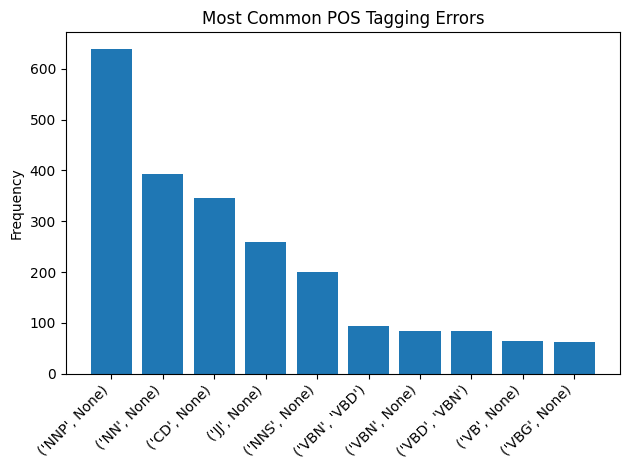

In [25]:
# Import necessary libraries
import nltk
from nltk.corpus import treebank
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger
from nltk.probability import FreqDist

# Download the necessary corpus
nltk.download('treebank')

# Load the Treebank Corpus for training and testing
# We're splitting the corpus into train and test data
train_data = treebank.tagged_sents()[:3000]  # First 3000 sentences for training
test_data = treebank.tagged_sents()[3000:]   # Remaining sentences for testing

# Dictionary that maps POS tags to their meanings for better understanding
pos_meaning = {
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb'
}

# Step 1: Train and Evaluate a Tagger
# -----------------------------------
# Train a Bigram tagger with Unigram backoff
unigram_tagger = UnigramTagger(train_data)
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)

# Evaluate the tagger’s performance on the test data
accuracy = bigram_tagger.evaluate(test_data)
print(f"Bigram Tagger Accuracy: {accuracy:.4f}")

# Step 2: Identify Mistakes
# -------------------------
# Loop through test data to identify errors by comparing the actual tags (gold standard)
# with the predicted tags produced by the Bigram tagger.
errors = []  # Store errors for analysis

for sent in test_data:
    tagged_sent = bigram_tagger.tag([word for word, tag in sent])
    for (word, correct_tag), (word2, predicted_tag) in zip(sent, tagged_sent):
        if correct_tag != predicted_tag:
            correct_tag_meaning = pos_meaning.get(correct_tag, "Unknown tag")
            predicted_tag_meaning = pos_meaning.get(predicted_tag, "Unknown tag")
            errors.append((word, correct_tag, predicted_tag))
            print(f"Error: '{word}' was tagged as '{predicted_tag}' ({predicted_tag_meaning}), "
                  f"but should be '{correct_tag}' ({correct_tag_meaning})")

# Step 3: Analyze Patterns in the Errors
# --------------------------------------
# Extract the correct and predicted tags from the errors and calculate the frequency distribution
error_tags = [(correct_tag, predicted_tag) for (word, correct_tag, predicted_tag) in errors]

# Compute the frequency distribution of the errors
error_dist = FreqDist(error_tags)

# Print the 10 most common misclassifications
print("\nMost Common Errors:")
for error, freq in error_dist.most_common(10):
    correct_tag_meaning = pos_meaning.get(error[0], "Unknown tag")
    predicted_tag_meaning = pos_meaning.get(error[1], "Unknown tag")
    print(f"{error}: {freq} occurrences -- (Correct Tag: {correct_tag_meaning}, Predicted Tag: {predicted_tag_meaning})")

# Step 4: Visualization
# --------------------------------
import matplotlib.pyplot as plt

# Create a bar chart of the most common errors
labels, values = zip(*error_dist.most_common(10))
plt.bar(range(len(labels)), values)
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.title('Most Common POS Tagging Errors')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##### implementation of the code using the Brown Corpus for POS tagging and error analysis

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Bigram Tagger Accuracy: 0.8193
Error: 'until' was tagged as 'CS' (Unknown tag), but should be 'IN' (Preposition or subordinating conjunction)
Error: '154' was tagged as 'None' (Unknown tag), but should be 'CD' (Cardinal number)
Error: 'Baseball' was tagged as 'NN-TL' (Unknown tag), but should be 'NN' (Noun, singular or mass)
Error: '154' was tagged as 'None' (Unknown tag), but should be 'CD' (Cardinal number)
Error: '154' was tagged as 'None' (Unknown tag), but should be 'CD' (Cardinal number)
Error: 'ideal' was tagged as 'None' (Unknown tag), but should be 'JJ' (Adjective)
Error: 'easier' was tagged as 'None' (Unknown tag), but should be 'JJR' (Adjective, comparative)
Error: 'to' was tagged as 'TO' (to), but should be 'IN' (Preposition or subordinating conjunction)
Error: 'Roommates' was tagged as 'None' (Unknown tag), but should be 'NNS-HL' (Unknown tag)
Error: ':' was tagged as ':' (Unknown tag), but should be ':-HL' (Unknown tag)
Error: 'Neither' was tagged as 'DTX' (Unknown tag), 

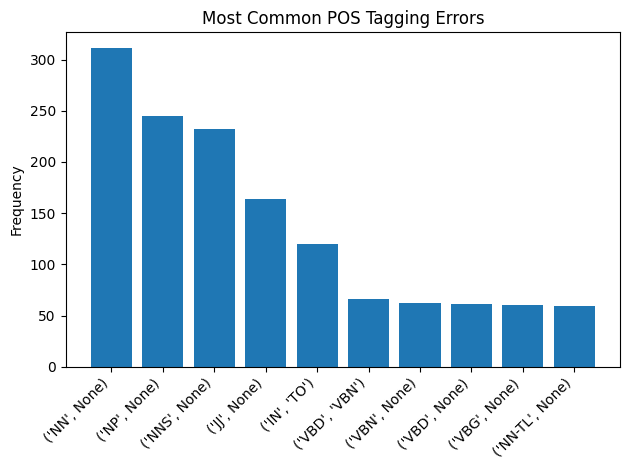

In [27]:
# Import necessary libraries
import nltk
from nltk.corpus import brown
from nltk.tag import UnigramTagger, BigramTagger
from nltk.probability import FreqDist

# Download the necessary corpus
nltk.download('brown')

# Load the Brown Corpus for training and testing
# We're splitting the corpus into train and test data
train_data = brown.tagged_sents(categories='news')[:4000]  # First 4000 sentences for training
test_data = brown.tagged_sents(categories='news')[4000:]   # Remaining sentences for testing

# Dictionary that maps POS tags to their meanings for better understanding
pos_meaning = {
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb'
}

# Step 1: Train and Evaluate a Tagger
# -----------------------------------
# Train a Bigram tagger with Unigram backoff
unigram_tagger = UnigramTagger(train_data)
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)

# Evaluate the tagger’s performance on the test data
accuracy = bigram_tagger.evaluate(test_data)
print(f"Bigram Tagger Accuracy: {accuracy:.4f}")

# Step 2: Identify Mistakes
# -------------------------
# Loop through test data to identify errors by comparing the actual tags (gold standard)
# with the predicted tags produced by the Bigram tagger.
errors = []  # Store errors for analysis

for sent in test_data:
    tagged_sent = bigram_tagger.tag([word for word, tag in sent])
    for (word, correct_tag), (word2, predicted_tag) in zip(sent, tagged_sent):
        if correct_tag != predicted_tag:
            correct_tag_meaning = pos_meaning.get(correct_tag, "Unknown tag")
            predicted_tag_meaning = pos_meaning.get(predicted_tag, "Unknown tag")
            errors.append((word, correct_tag, predicted_tag))
            print(f"Error: '{word}' was tagged as '{predicted_tag}' ({predicted_tag_meaning}), "
                  f"but should be '{correct_tag}' ({correct_tag_meaning})")

# Step 3: Analyze Patterns in the Errors
# --------------------------------------
# Extract the correct and predicted tags from the errors and calculate the frequency distribution
error_tags = [(correct_tag, predicted_tag) for (word, correct_tag, predicted_tag) in errors]

# Compute the frequency distribution of the errors
error_dist = FreqDist(error_tags)

# Print the 10 most common misclassifications
print("\nMost Common Errors:")
for error, freq in error_dist.most_common(10):
    correct_tag_meaning = pos_meaning.get(error[0], "Unknown tag")
    predicted_tag_meaning = pos_meaning.get(error[1], "Unknown tag")
    print(f"{error}: {freq} occurrences -- (Correct Tag: {correct_tag_meaning}, Predicted Tag: {predicted_tag_meaning})")

# Step 4: Visualization (Optional)
# --------------------------------
# If you'd like to visualize the errors, you can use a confusion matrix or a bar chart
import matplotlib.pyplot as plt

# Create a bar chart of the most common errors
labels, values = zip(*error_dist.most_common(10))
plt.bar(range(len(labels)), values)
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.title('Most Common POS Tagging Errors')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The bar chart represents the most common errors made by the POS tagger when tagging sentences from the Brown corpus. Each bar represents a specific type of error where the correct tag (on the left) and the incorrect predicted tag (on the right) are shown. In the cases where the tagger has outputted None, it indicates that the tagger failed to assign any tag to the word.

#### **Exercise 6: Unsupervised POS Tagging with Clustering**

- POS tagging is typically a **supervised learning task**, but here we will explore **unsupervised POS tagging** using **clustering** techniques.
- In unsupervised approaches, tags are not predefined; instead, the model attempts to group words into clusters that correspond to different parts of speech based on distributional similarity.



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Features for a sample sentence:
{'bias': 1.0, 'word.lower()': 'the', 'word[-3:]': 'The', 'word[-2:]': 'he', 'word.isupper()': False, 'word.istitle()': True, 'word.isdigit()': False, 'BOS': True, 'next_word.lower()': 'fulton', 'next_suffix': 'ton'}
{'bias': 1.0, 'word.lower()': 'fulton', 'word[-3:]': 'ton', 'word[-2:]': 'on', 'word.isupper()': False, 'word.istitle()': True, 'word.isdigit()': False, 'prev_word.lower()': 'the', 'prev_suffix': 'The', 'next_word.lower()': 'county', 'next_suffix': 'nty'}
{'bias': 1.0, 'word.lower()': 'county', 'word[-3:]': 'nty', 'word[-2:]': 'ty', 'word.isupper()': False, 'word.istitle()': True, 'word.isdigit()': False, 'prev_word.lower()': 'fulton', 'prev_suffix': 'ton', 'next_word.lower()': 'grand', 'next_suffix': 'and'}
{'bias': 1.0, 'word.lower()': 'grand', 'word[-3:]': 'and', 'word[-2:]': 'nd', 'word.isupper()': False, 'word.istitle()': True, 'word.isdigit()': False, 'prev_word.lower()': 'county', 'prev_suffix': 'nty', 'next_word.lower()': 'jury', 'nex

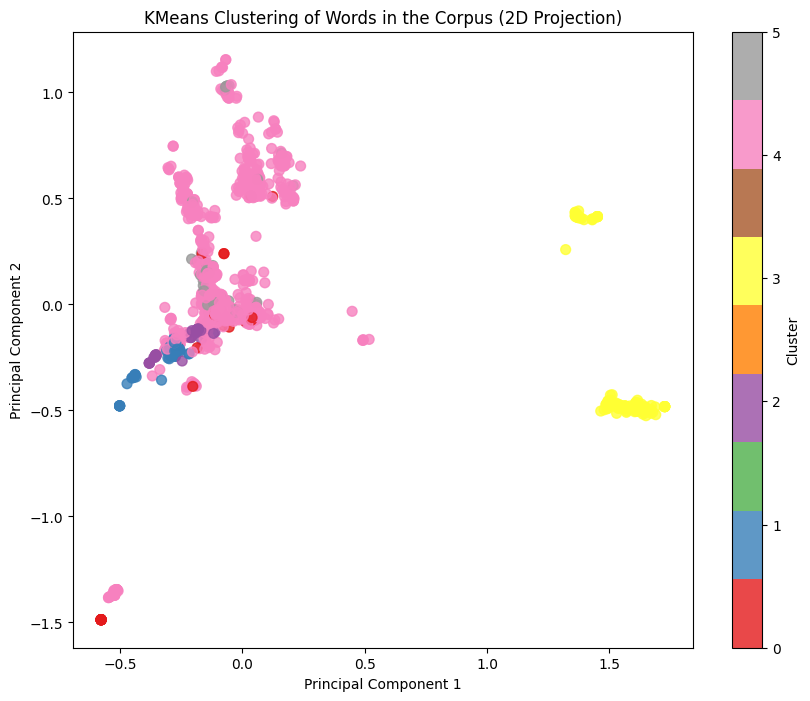


Cluster 0: ['Grand', 'term-end', 'and', 'and', '.', 'find', 'and', 'and', '.', 'and']

Cluster 1: [',', ',', ',', ',', ',', ',', ',', ',', ',', ',']

Cluster 2: ['of', 'of', 'of', 'of', 'of', 'of', 'of', 'of', 'of', 'of']

Cluster 3: ['The', 'The', 'the', 'the', 'the', 'the', 'the', 'the', 'The', 'the']

Cluster 4: ['Fulton', 'County', 'Jury', 'said', 'Friday', 'an', 'investigation', "Atlanta's", 'recent', 'primary']

Cluster 5: ['investigate', 'Mayor-nominate', 'relative', 'inadequate', 'number', 'result', 'date', 'swipe', 'State', 'State']


In [29]:
# Exercise 6: Unsupervised POS Tagging with Clustering (Detailed Version)

# Import necessary libraries
import nltk
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure necessary NLTK corpora and models are downloaded
nltk.download('brown')
nltk.download('universal_tagset')

# Step 1: Load a Sample Corpus
# We'll use the Brown corpus from NLTK, which is already POS tagged
# The "universal_tagset" is a simplified tagset (e.g., 'NOUN', 'VERB', etc.)
from nltk.corpus import brown
corpus = brown.tagged_sents(tagset='universal')

# Taking a subset of the corpus to reduce the size for this example
sample_corpus = corpus[:100]

# Step 2: Feature Extraction
# Define a function to extract features from a word and its context
def word2features(sent, i):
    word = sent[i][0]
    features = {
        'bias': 1.0,  # Bias feature to ensure model robustness
        'word.lower()': word.lower(),  # Lowercase version of the word
        'word[-3:]': word[-3:],  # Last three letters of the word (suffix)
        'word[-2:]': word[-2:],  # Last two letters (shorter suffix)
        'word.isupper()': word.isupper(),  # Is the word uppercase?
        'word.istitle()': word.istitle(),  # Is the word capitalized as a title?
        'word.isdigit()': word.isdigit(),  # Is the word a digit?
    }

    # Add features for previous word if it's not the first word
    if i > 0:
        prev_word = sent[i-1][0]
        features.update({
            'prev_word.lower()': prev_word.lower(),  # Lowercase version of the previous word
            'prev_suffix': prev_word[-3:],  # Suffix of the previous word
        })
    else:
        features['BOS'] = True  # Special feature for the beginning of a sentence (BOS)

    # Add features for next word if it's not the last word
    if i < len(sent) - 1:
        next_word = sent[i+1][0]
        features.update({
            'next_word.lower()': next_word.lower(),  # Lowercase version of the next word
            'next_suffix': next_word[-3:],  # Suffix of the next word
        })
    else:
        features['EOS'] = True  # Special feature for the end of a sentence (EOS)

    return features

# Let's extract features for a single sentence from the corpus to understand the structure
print("Features for a sample sentence:")
sample_sentence = sample_corpus[0]
features = [word2features(sample_sentence, i) for i in range(len(sample_sentence))]
for f in features:
    print(f)

# Step 3: Prepare Data for Clustering
# Vectorize the feature dictionaries into numerical vectors for clustering
vectorizer = DictVectorizer(sparse=False)
X = []  # This will hold the feature vectors
for sentence in sample_corpus:
    for i in range(len(sentence)):
        features = word2features(sentence, i)
        X.append(features)

# Transform features into numerical format
X_vectorized = vectorizer.fit_transform(X)
print(f"\nNumber of feature vectors created: {len(X_vectorized)}")

# Step 4: Apply Clustering Algorithm
# Apply KMeans to group the words based on their features (unlabeled)
kmeans = KMeans(n_clusters=6, random_state=42)  # Setting n_clusters=6 for simplicity
kmeans.fit(X_vectorized)

# The model assigns a cluster label to each word
clusters = kmeans.labels_
print(f"\nFirst 20 cluster labels assigned by KMeans:\n{clusters[:20]}")

# Step 5: Analyze and Evaluate the Clustering
# We'll check what words belong to which clusters for manual analysis
for i, sentence in enumerate(sample_corpus[:5]):  # Analyzing only the first 5 sentences
    print(f"\nSentence {i+1}:")
    for j, (word, tag) in enumerate(sentence):
        print(f"Word: {word}, Original Tag: {tag}, Cluster: {clusters[j]}")

# Step 6: Visualization of Clusters (Optional)
# Reduce the feature vectors to 2D using PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_vectorized)

# Plot clusters in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='Set1', s=50, alpha=0.8)
plt.title("KMeans Clustering of Words in the Corpus (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Evaluation of Cluster Quality
# This step involves manually evaluating how well the clusters align with parts of speech
# In a real scenario, you'd compare the clusters against known POS tags, but in this case,
# We visually inspect the clusters and corresponding POS tags

# Let's examine which words belong to the first few clusters
cluster_words = {}
for cluster_id in range(6):
    cluster_words[cluster_id] = []

for i, (word, tag) in enumerate([(w, t) for sent in sample_corpus for w, t in sent]):
    cluster_words[clusters[i]].append(word)

for cluster_id, words in cluster_words.items():
    print(f"\nCluster {cluster_id}: {words[:10]}")  # Print the first 10 words of each cluster


##### **Evaluation**

Accuracy of KMeans Clustering for POS Tagging: 0.47

Detailed Performance Metrics by POS Tag:
POS Tag: NUM
  Precision: 0.00
  Recall:    0.00
  F1-Score:  0.00

POS Tag: DET
  Precision: 1.00
  Recall:    0.56
  F1-Score:  0.72

POS Tag: CONJ
  Precision: 0.56
  Recall:    0.85
  F1-Score:  0.67

POS Tag: .
  Precision: 1.00
  Recall:    0.34
  F1-Score:  0.51

POS Tag: ADV
  Precision: 0.00
  Recall:    0.00
  F1-Score:  0.00

POS Tag: PRON
  Precision: 0.00
  Recall:    0.00
  F1-Score:  0.00

POS Tag: PRT
  Precision: 0.00
  Recall:    0.00
  F1-Score:  0.00

POS Tag: ADP
  Precision: 1.00
  Recall:    0.26
  F1-Score:  0.41

POS Tag: VERB
  Precision: 0.00
  Recall:    0.00
  F1-Score:  0.00

POS Tag: ADJ
  Precision: 0.00
  Recall:    0.00
  F1-Score:  0.00

POS Tag: NOUN
  Precision: 0.38
  Recall:    0.99
  F1-Score:  0.55

Macro-Averaged F1-Score: 0.26


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Homogeneity Score: 0.20
Completeness Score: 0.50


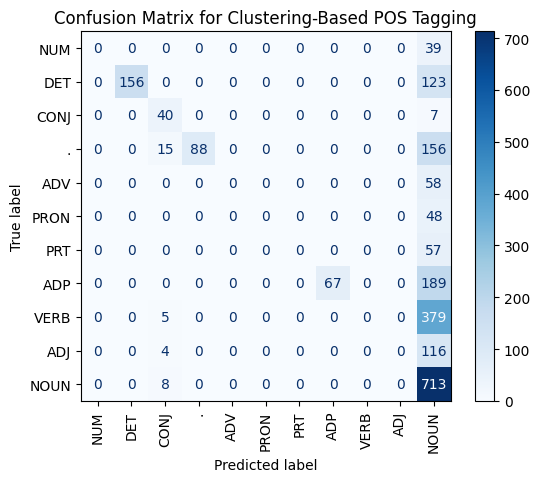

In [34]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, homogeneity_score, completeness_score

# Step 8: Assign majority POS tags to clusters (same as before)
def assign_cluster_labels(corpus, clusters):
    from collections import defaultdict
    cluster_to_pos = defaultdict(list)
    i = 0
    # Collect the true POS tags for words in each cluster
    for sentence in corpus:
        for word, true_pos in sentence:
            cluster_to_pos[clusters[i]].append(true_pos)
            i += 1
    # Determine the most frequent POS tag in each cluster
    cluster_majority_tag = {}
    for cluster_id, tags in cluster_to_pos.items():
        cluster_majority_tag[cluster_id] = max(set(tags), key=tags.count)

    return cluster_majority_tag

# Assign cluster labels based on majority vote
cluster_majority_tag = assign_cluster_labels(sample_corpus, clusters)

# Step 9: Predict the POS tag for each word and compare with the true POS tags
predicted_tags = []
true_tags = []
i = 0
for sentence in sample_corpus:
    for word, true_pos in sentence:
        predicted_tag = cluster_majority_tag[clusters[i]]
        predicted_tags.append(predicted_tag)
        true_tags.append(true_pos)
        i += 1

# Step 10: Calculate Evaluation Metrics

# Accuracy
accuracy = accuracy_score(true_tags, predicted_tags)
print(f"Accuracy of KMeans Clustering for POS Tagging: {accuracy:.2f}")

# Precision, Recall, F1-Score for each POS tag
precision, recall, f1, _ = precision_recall_fscore_support(true_tags, predicted_tags, average=None, labels=list(set(true_tags)))

print("\nDetailed Performance Metrics by POS Tag:")
for i, tag in enumerate(set(true_tags)):
    print(f"POS Tag: {tag}")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall:    {recall[i]:.2f}")
    print(f"  F1-Score:  {f1[i]:.2f}\n")

# Overall macro-averaged F1-Score
macro_f1 = precision_recall_fscore_support(true_tags, predicted_tags, average='macro')
print(f"Macro-Averaged F1-Score: {macro_f1[2]:.2f}")

# Step 11: Homogeneity and Completeness
# Homogeneity: Measures if all clusters contain only data points from a single class (true POS tag).
# Completeness: Measures if all data points of a given class are assigned to the same cluster.

homogeneity = homogeneity_score(true_tags, clusters)
completeness = completeness_score(true_tags, clusters)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")

# Step 12: Generate Confusion Matrix (Optional, same as before)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_tags, predicted_tags, labels=list(set(true_tags)))

# Display the confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=list(set(true_tags)))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix for Clustering-Based POS Tagging")
plt.show()


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import silhouette_score
import numpy as np

# Step 11: Precision, Recall, and F1-Score for Each Tag
# We calculate precision, recall, and F1-score to evaluate how well each tag is predicted

# Generate classification report
report = classification_report(true_tags, predicted_tags, labels=list(set(true_tags)))
print("\nClassification Report (Precision, Recall, F1-Score for each POS tag):")
print(report)

# Step 12: Per-Tag Accuracy
# Calculate accuracy for each tag individually to see which POS tags the model handles well
def per_tag_accuracy(true_tags, predicted_tags):
    tag_accuracies = {}
    tag_counts = {}

    for true, predicted in zip(true_tags, predicted_tags):
        if true not in tag_accuracies:
            tag_accuracies[true] = 0
            tag_counts[true] = 0

        tag_counts[true] += 1
        if true == predicted:
            tag_accuracies[true] += 1

    for tag in tag_accuracies:
        tag_accuracies[tag] = tag_accuracies[tag] / tag_counts[tag]

    return tag_accuracies

# Compute accuracy per POS tag
tag_accuracy = per_tag_accuracy(true_tags, predicted_tags)
print("\nPer-Tag Accuracy:")
for tag, acc in tag_accuracy.items():
    print(f"{tag}: {acc:.2f}")




Classification Report (Precision, Recall, F1-Score for each POS tag):
              precision    recall  f1-score   support

         NUM       0.00      0.00      0.00        39
         DET       1.00      0.56      0.72       279
        CONJ       0.56      0.85      0.67        47
           .       1.00      0.34      0.51       259
         ADV       0.00      0.00      0.00        58
        PRON       0.00      0.00      0.00        48
         PRT       0.00      0.00      0.00        57
         ADP       1.00      0.26      0.41       256
        VERB       0.00      0.00      0.00       384
         ADJ       0.00      0.00      0.00       120
        NOUN       0.38      0.99      0.55       721

    accuracy                           0.47      2268
   macro avg       0.36      0.27      0.26      2268
weighted avg       0.48      0.47      0.38      2268


Per-Tag Accuracy:
DET: 0.56
NOUN: 0.99
ADJ: 0.00
VERB: 0.00
ADP: 0.26
.: 0.34
ADV: 0.00
CONJ: 0.85
PRT: 0.00
PRON: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:

# Step 13: Silhouette Score (Cluster Quality)
# The silhouette score is a measure of how well-separated the clusters are.
# It ranges from -1 (bad separation) to 1 (perfect separation).

silhouette_avg = silhouette_score(X_vectorized, clusters)
print(f"\nSilhouette Score for KMeans Clustering: {silhouette_avg:.2f}")

# Step 14: Detailed Error Analysis (Optional)
# Identify specific examples where the model failed and analyze them.
print("\nExamples of Misclassifications:")
for true, pred, word in zip(true_tags, predicted_tags, [w for sent in sample_corpus for w, _ in sent]):
    if true != pred:
        print(f"Word: {word}, True Tag: {true}, Predicted Tag: {pred}")


Silhouette Score for KMeans Clustering: 0.03

Examples of Misclassifications:
Word: Grand, True Tag: ADJ, Predicted Tag: CONJ
Word: said, True Tag: VERB, Predicted Tag: NOUN
Word: an, True Tag: DET, Predicted Tag: NOUN
Word: recent, True Tag: ADJ, Predicted Tag: NOUN
Word: produced, True Tag: VERB, Predicted Tag: NOUN
Word: ``, True Tag: ., Predicted Tag: NOUN
Word: no, True Tag: DET, Predicted Tag: NOUN
Word: '', True Tag: ., Predicted Tag: NOUN
Word: that, True Tag: ADP, Predicted Tag: NOUN
Word: any, True Tag: DET, Predicted Tag: NOUN
Word: took, True Tag: VERB, Predicted Tag: NOUN
Word: ., True Tag: ., Predicted Tag: NOUN
Word: further, True Tag: ADV, Predicted Tag: NOUN
Word: said, True Tag: VERB, Predicted Tag: NOUN
Word: in, True Tag: ADP, Predicted Tag: NOUN
Word: term-end, True Tag: NOUN, Predicted Tag: CONJ
Word: that, True Tag: ADP, Predicted Tag: NOUN
Word: Executive, True Tag: ADJ, Predicted Tag: NOUN
Word: which, True Tag: DET, Predicted Tag: NOUN
Word: had, True Tag: VE

#### **Exercise 7: Conditional Random Fields (CRF) Tagger**

- Here, we implement a **Conditional Random Fields (CRF)** tagger.
- CRFs are discriminative models that work well for **sequence labeling** tasks such as POS tagging, named entity recognition (NER), and more.
- CRFs consider the entire sentence when assigning POS tags, unlike HMMs, which are generative models.



##### **What is a CRF Tagger?**

- A **Conditional Random Fields (CRF) tagger** is a type of machine learning model used for sequence labeling tasks like **Part-of-Speech (POS) tagging**, **Named Entity Recognition (NER)**, and other natural language processing (NLP) tasks.
- A **sequence labeling task** involves assigning a label (or tag) to each item in a sequence, such as tagging each word in a sentence with its corresponding part of speech (e.g., noun, verb, adjective).

- CRF taggers are particularly powerful for **sequence data** because they take into account both the observed features of the input (like the words in a sentence) and the relationships between the labels (like the dependencies between consecutive POS tags).
- This allows CRFs to better model complex patterns and relationships in text.



##### **How Does a CRF Tagger Work?**

The CRF tagger works by:
1. **Extracting Features**: For each word in a sentence, the model extracts various features. These features include:
   - The word itself (in lowercase, uppercase, etc.).
   - Whether the word is a number or a title.
   - Information about neighboring words (context).
   
2. **Modeling Transitions**: CRFs consider the **transitions** between tags (for example, the likelihood that a noun will follow a determiner) as well as the features of the current word. This is different from simpler models like **unigram** taggers, which tag words based only on the current word's features without looking at the surrounding context or previous tags.

3. **Training**: The CRF is trained on a labeled dataset (where the words and their corresponding POS tags are known). During training, the model learns to associate specific features with particular tags and learns which tag transitions are most likely.

4. **Prediction**: Once trained, the CRF tagger can be used to predict the most likely sequence of tags for new, unseen sentences. It does this by finding the tag sequence that maximizes the likelihood of both the features and the transitions between tags.

5. **Regularization and Optimization**: CRFs use optimization techniques (such as **L-BFGS** for large datasets) and regularization (penalizing complex models to avoid overfitting) to improve the model’s performance.



##### **Why Use CRF for POS Tagging?**

- **Context Sensitivity**: CRFs take into account the surrounding words and their tags, which helps the model handle context better than simple models like unigrams or bigrams.
  
- **Flexibility**: CRFs allow for a flexible definition of features. You can include all kinds of information about the words in a sentence to improve tagging accuracy.

- **Better Handling of Sequence Data**: Unlike simpler models, CRFs are well-suited for tasks that involve predicting sequences because they explicitly model the dependencies between tags.

---

In short, a **CRF tagger** is a **sequence model** that makes tagging decisions based on both word features and the relationship between tags in a sequence, making it a powerful tool for complex NLP tasks like POS tagging.

##### Implementation

In [42]:
!pip install sklearn-crfsuite # Install the missing package


  Using cached sklearn_crfsuite-0.5.0-py2.py3-none-any.whl.metadata (4.9 kB)
  Using cached python_crfsuite-0.9.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
Using cached sklearn_crfsuite-0.5.0-py2.py3-none-any.whl (10 kB)
Using cached python_crfsuite-0.9.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)


In [45]:
# Import necessary libraries

import nltk
from sklearn_crfsuite import CRF
from nltk.corpus import brown

# Step 1: Load the Brown Corpus
# The Brown Corpus is a collection of English text with part-of-speech (POS) tags.
nltk.download('brown')
nltk.download('universal_tagset')  # Universal POS tagset

# Use the Brown corpus and tagset as the dataset
train_data = brown.tagged_sents(tagset='universal')[:40000]  # First 40k sentences for training
test_data = brown.tagged_sents(tagset='universal')[40000:]   # Rest for testing

# Step 2: Feature Extraction Function
# Define a function to extract features for each word in a sentence. These features will be used by the CRF model.
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    # Initialize feature dictionary
    features = {
        'bias': 1.0,  # Bias term for CRF learning
        'word.lower()': word.lower(),  # Word in lowercase
        'word[-3:]': word[-3:],  # Last 3 letters of the word (suffix)
        'word[-2:]': word[-2:],  # Last 2 letters of the word (suffix)
        'word.isupper()': word.isupper(),  # If the word is in all caps
        'word.istitle()': word.istitle(),  # If the word starts with a capital letter
        'word.isdigit()': word.isdigit(),  # If the word is a digit
        'postag': postag,  # The POS tag of the word
    }

    # Features for previous word (i-1)
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            'prev_word.lower()': word1.lower(),
            'prev_word.isupper()': word1.isupper(),
            'prev_word.istitle()': word1.istitle(),
            'prev_word.isdigit()': word1.isdigit(),
            'prev_postag': postag1,
        })
    else:
        features['BOS'] = True  # Beginning of sentence

    # Features for next word (i+1)
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            'next_word.lower()': word1.lower(),
            'next_word.isupper()': word1.isupper(),
            'next_word.istitle()': word1.istitle(),
            'next_word.isdigit()': word1.isdigit(),
            'next_postag': postag1,
        })
    else:
        features['EOS'] = True  # End of sentence

    return features

# Step 3: Sentence to Features Conversion
# Convert each sentence into a list of feature dictionaries, one for each word.
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

# Step 4: Sentence to Labels Conversion
# Extract the labels (i.e., the tags) for each word in the sentence.
def sent2labels(sent):
    return [label for token, label in sent]

# Step 5: Convert Data for Training
# Apply the conversion functions to the entire training and test datasets.
X_train = [sent2features(s) for s in train_data]
y_train = [sent2labels(s) for s in train_data]

X_test = [sent2features(s) for s in test_data]
y_test = [sent2labels(s) for s in test_data]

# Step 6: Training the CRF Model
# Initialize the CRF model and fit it to the training data.
crf = CRF(
    algorithm='lbfgs',  # Optimization algorithm: L-BFGS
    c1=0.1,  # Coefficient for L1 regularization
    c2=0.1,  # Coefficient for L2 regularization
    max_iterations=100,  # Maximum number of iterations during training
    all_possible_transitions=True  # Allow transition between any pair of labels
)

# Train the CRF model
crf.fit(X_train, y_train)

# Step 7: Testing and Evaluation
# Evaluate the model on the test set using precision, recall, and F1-score metrics.
from sklearn_crfsuite import metrics

y_pred = crf.predict(X_test)

# Print the classification report
print(metrics.flat_classification_report(
    y_test, y_pred, digits=3
))

# Step 8: Evaluating the CRF Model
# You can also compute accuracy, precision, and other metrics using scikit-learn's built-in functions.
accuracy = metrics.flat_accuracy_score(y_test, y_pred)
print(f"CRF Model Accuracy: {accuracy:.3f}")

# Step 9: Error Analysis
# If you want to investigate where the model struggles, compare predictions with true labels.
for i in range(5):  # Show a few example sentences
    print(f"Sentence {i + 1}:")
    print("True Labels:", y_test[i])
    print("Predicted Labels:", y_pred[i])
    print("\n")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


              precision    recall  f1-score   support

           .      1.000     1.000     1.000     42896
         ADJ      1.000     1.000     1.000     14460
         ADP      1.000     1.000     1.000     27872
         ADV      1.000     1.000     1.000     15450
        CONJ      1.000     1.000     1.000      8791
         DET      1.000     1.000     1.000     30319
        NOUN      1.000     1.000     1.000     51713
         NUM      1.000     1.000     1.000      1767
        PRON      1.000     1.000     1.000     20463
         PRT      1.000     1.000     1.000     10091
        VERB      1.000     1.000     1.000     48814
           X      1.000     1.000     1.000       265

    accuracy                          1.000    272901
   macro avg      1.000     1.000     1.000    272901
weighted avg      1.000     1.000     1.000    272901

CRF Model Accuracy: 1.000
Sentence 1:
True Labels: ['DET', 'NOUN', 'VERB', 'VERB', 'ADP', 'DET', 'ADJ', 'NOUN', 'ADP', 'DET', 'NOUN',


##### **Performance of the CRF Model:**
1. **Precision, Recall, and F1-score:**
   - For each part-of-speech (POS) tag (like ADJ, ADV, NOUN, VERB, etc.), the CRF model achieved **1.000** in **precision**, **recall**, and **F1-score**. This means that for each tag, the model perfectly identified both the correct tags (precision) and tagged all relevant instances correctly (recall), leading to an F1-score of 1.000.
   
2. **Accuracy:**
   - The overall **accuracy** of the model is **1.000**, meaning the model tagged all the words in the test set perfectly, with no mistakes.



##### **Interpretation of Sentence Predictions:**
- **Sentence 1 to Sentence 5**: The output compares the **true labels** (actual POS tags) with the **predicted labels** (tags predicted by the CRF model) for five example sentences.
  - For each of these sentences, the **predicted labels** match the **true labels** perfectly, indicating that the model performed exceptionally well on these examples.



##### **Possible Interpretation:**
- **Model Overfitting**:
  - Achieving a perfect score across all metrics may indicate that the model has overfitted to the training data.
  - Overfitting means the model has learned to memorize the training data too well, which could result in poorer performance when exposed to new, unseen data.
  
- **Test Data Characteristics**:
  - If the test set is relatively simple or highly similar to the training data, achieving perfect results is possible, but not representative of how the model would generalize to more complex or different text.



#### **Exercise 8: Fine-Tuning Pretrained Language Models for POS Tagging**



##### **Why Use Pretrained Models Like BERT for POS Tagging?**

Pretrained models like **BERT** are highly effective for POS tagging because they are trained on huge datasets and can handle **contextual understanding**. They:

- **Consider the entire sentence context**: Unlike traditional taggers that might only look at a few surrounding words, BERT sees the entire sentence, helping it disambiguate tags.
- **Handle ambiguous words better**: Words that can serve multiple roles (e.g., “bank” as both a noun and a verb) are tagged more accurately based on sentence context.
- **Leverage transfer learning**: These models can be fine-tuned on smaller, domain-specific datasets, making them adaptable to specific tasks.



##### **How Does Fine-Tuning Work for POS Tagging?**

When we fine-tune a model like BERT for POS tagging:

1. **Pretrained Knowledge**: The model starts with the knowledge it has already acquired from a large corpus.
2. **Task-Specific Training**: We then fine-tune it on a smaller, POS-tagged dataset, which teaches the model to adapt its knowledge to the specific task of POS tagging.
3. **Application**: Once fine-tuned, the model can be used to tag unseen sentences accurately, handling various grammatical structures and contexts.


##### Code Implementation

- Will be discussing in the coming section

#### **Exercise 9: Implementing a Bidirectional LSTM (BiLSTM) Tagger**

- This guides learners through implementing a **Bidirectional LSTM (BiLSTM)** POS tagger.
- BiLSTM models are powerful because they take both previous and following words into account when predicting the part of speech of a word, making them ideal for sequence tagging tasks.



##### What is a Bidirectional LSTM POS Tagger?

A **Bidirectional Long Short-Term Memory (BiLSTM) POS Tagger** is a type of **neural network model** designed to automatically assign **Part-of-Speech (POS) tags** to words in a sentence. POS tags indicate the grammatical role of a word in the sentence, such as noun, verb, or adjective.

- **LSTM**: LSTM stands for **Long Short-Term Memory**, a type of neural network architecture that is designed to handle sequences of data (like sentences). It is particularly good at capturing long-term dependencies in sequences, which is crucial for tasks like POS tagging because understanding the part of speech of a word often depends on the surrounding words in a sentence.
  
- **Bidirectional**: A **bidirectional** LSTM processes a sentence in **both directions**—forward (from the start of the sentence to the end) and backward (from the end of the sentence to the start). This helps the model capture information from both past and future words, making it more accurate at understanding the context of a word in the sentence.



##### How Does It Work?

1. **Word Embeddings**: The model starts by converting words into vectors called **word embeddings**, which are continuous numerical representations of words. These embeddings help the model understand the relationships between words in terms of their meanings.

2. **Bidirectional LSTM Layer**: The sentence is passed through a **Bidirectional LSTM**. One LSTM reads the sentence from left to right (forward), while another LSTM reads it from right to left (backward). This allows the model to use information from both past and future words when making decisions about the current word's POS tag.

3. **Tag Prediction**: After processing the sentence, the BiLSTM outputs a sequence of predictions—one for each word. These predictions are passed through a **fully connected layer** that maps the LSTM outputs to a set of possible POS tags (like noun, verb, adjective, etc.).

4. **Log-Softmax Layer**: Finally, a **log-softmax** layer is applied to the output to generate probabilities for each tag, and the highest probability tag is chosen as the prediction for that word.



##### Why Do We Need a Bidirectional LSTM for POS Tagging?

POS tagging requires understanding the context of each word in the sentence. For example, consider the word "bank" in the following sentences:
- "I went to the **bank**." (noun)
- "I will **bank** on your support." (verb)

In the first sentence, "bank" is a noun, but in the second sentence, it's a verb. The meaning changes depending on the surrounding words, so we need to look at both **previous** and **future** words to make the right POS tagging decision.

A **Bidirectional LSTM** is perfect for this because it processes the sentence in both directions, allowing it to use **future words** as well as **past words** to make more informed predictions. Regular LSTMs only process the sequence in one direction (past to future), so they may miss out on important context from future words.



##### Benefits of Using a BiLSTM for POS Tagging

- **Contextual Understanding**: BiLSTM captures both the left and right context, allowing for more accurate tagging, especially in cases where the part of speech is ambiguous without looking ahead in the sentence.
  
- **Handles Long Sequences**: LSTM models are designed to handle long-term dependencies, making them suitable for sentences with complex structures or distant dependencies between words.

- **Improved Accuracy**: Since it looks at the entire sentence (both forward and backward), BiLSTM models often achieve higher accuracy compared to models that only process the sentence in one direction, such as simple n-gram models or regular LSTMs.



##### When to Use a BiLSTM POS Tagger?

- **Complex Sentences**: If the sentences you are working with have complex grammar, long dependencies between words, or multiple clauses, a BiLSTM POS tagger can handle them more effectively than simpler models.
  
- **Ambiguous Words**: If your text contains many ambiguous words (words that could have different POS tags depending on the context), a BiLSTM can help disambiguate them by considering the broader context in both directions.



##### Limitations of BiLSTM POS Taggers

- **Computationally Expensive**: BiLSTMs require more computational resources and time to train than simpler models like unigram or bigram taggers, especially when processing large datasets.
  
- **Need for Large Data**: To achieve high accuracy, BiLSTM models often need large amounts of labeled training data, which may not be available for every language or domain.


#### Implementation

In [37]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# SECTION 1: Data Preprocessing
# ------------------------------
# Define vocabulary and tagset
vocab = ['the', 'dog', 'barks', 'at', 'night', 'loudly']
pos_tags = ['DET', 'NOUN', 'VERB', 'ADP', 'NOUN', 'ADV']

# Create word-to-index and tag-to-index mappings
word2idx = {w: i for i, w in enumerate(vocab)}
tag2idx = {t: i for i, t in enumerate(pos_tags)}

# Sample training data (sentences represented as lists of words and tags)
train_sentences = [['the', 'dog', 'barks'], ['at', 'night', 'loudly']]
train_tags = [['DET', 'NOUN', 'VERB'], ['ADP', 'NOUN', 'ADV']]

# Convert words and tags to indices
train_X = [[word2idx[word] for word in sentence] for sentence in train_sentences]
train_y = [[tag2idx[tag] for tag in tags] for tags in train_tags]

# Convert lists to tensors
train_X_tensor = [torch.tensor(sentence) for sentence in train_X]
train_y_tensor = [torch.tensor(tags) for tags in train_y]

# Pad sequences to ensure they are of equal length
from torch.nn.utils.rnn import pad_sequence

train_X_padded = pad_sequence(train_X_tensor, batch_first=True)
train_y_padded = pad_sequence(train_y_tensor, batch_first=True)

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(train_X_padded, train_y_padded)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# SECTION 2: Building the BiLSTM Model
# ------------------------------------
class BiLSTMTagger(nn.Module):
    def __init__(self, vocab_size, tagset_size, embedding_dim=64, hidden_dim=128):
        super(BiLSTMTagger, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Word embeddings layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True)  # BiLSTM layer
        self.hidden2tag = nn.Linear(hidden_dim * 2, tagset_size)  # Linear layer for tag prediction

    def forward(self, sentence):
        embeds = self.embedding(sentence)  # Embed input sentence
        lstm_out, _ = self.lstm(embeds)  # Pass embeddings through the BiLSTM
        tag_space = self.hidden2tag(lstm_out)  # Map LSTM outputs to tag space
        tag_scores = nn.functional.log_softmax(tag_space, dim=2)  # Apply log-softmax
        return tag_scores

# Instantiate the model
vocab_size = len(vocab)
tagset_size = len(pos_tags)
model = BiLSTMTagger(vocab_size, tagset_size)

# SECTION 3: Training the BiLSTM Model
# ------------------------------------
# Define the loss function (negative log-likelihood) and optimizer (Adam)
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    for sentence, tags in train_loader:
        # Zero the parameter gradients
        model.zero_grad()

        # Forward pass: Get tag scores for the sentence
        tag_scores = model(sentence)

        # Compute the loss, reshape the target for NLLLoss compatibility
        loss = loss_function(tag_scores.view(-1, tagset_size), tags.view(-1))

        # Backward pass: Compute gradients and update weights
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

# SECTION 4: Evaluating the BiLSTM Model
# --------------------------------------
# Test data (same structure as training data)
test_sentences = [['the', 'dog', 'barks'], ['at', 'night', 'loudly']]
test_X = [[word2idx[word] for word in sentence] for sentence in test_sentences]

# Convert test sentences to tensor and pad sequences
test_X_tensor = [torch.tensor(sentence) for sentence in test_X]
test_X_padded = pad_sequence(test_X_tensor, batch_first=True)

# Run the model on test data
with torch.no_grad():
    tag_scores = model(test_X_padded)
    predicted_tags = torch.argmax(tag_scores, dim=2)

# Convert predicted tags back to readable format
idx2tag = {i: t for t, i in tag2idx.items()}
for sentence_idx, tags in enumerate(predicted_tags):
    print(f"Sentence {sentence_idx + 1}:")
    for word_idx, tag_idx in enumerate(tags):
        word = test_sentences[sentence_idx][word_idx]
        tag = idx2tag[int(tag_idx)]
        print(f"{word}: {tag}")


Epoch 1/10, Loss: 1.7792
Epoch 2/10, Loss: 1.0982
Epoch 3/10, Loss: 0.7421
Epoch 4/10, Loss: 0.3068
Epoch 5/10, Loss: 0.0607
Epoch 6/10, Loss: 0.0211
Epoch 7/10, Loss: 0.0057
Epoch 8/10, Loss: 0.0020
Epoch 9/10, Loss: 0.0008
Epoch 10/10, Loss: 0.0004
Sentence 1:
the: DET
dog: NOUN
barks: VERB
Sentence 2:
at: ADP
night: NOUN
loudly: ADV


In [40]:
# Import necessary libraries for evaluation
from sklearn.metrics import classification_report, accuracy_score

# SECTION 5: Evaluating the Model's Performance
# ---------------------------------------------

# Define a function to evaluate the performance of the model
def evaluate_model(model, test_data, test_tags, idx2tag, tagset_size):
    """
    Function to evaluate the BiLSTM model's performance on test data.

    Parameters:
    model (nn.Module): The trained BiLSTM model.
    test_data (Tensor): Padded test sentences.
    test_tags (Tensor): True tags for the test sentences.
    idx2tag (dict): Mapping from tag index to tag name.
    tagset_size (int): Total number of POS tags in the tagset.

    Returns:
    None
    """
    # Put the model in evaluation mode (disables dropout, etc.)
    model.eval()

    # Run the model on test data
    with torch.no_grad():
        tag_scores = model(test_data)  # Get the predicted tag scores from the model
        predicted_tags = torch.argmax(tag_scores, dim=2)  # Get the predicted tag indices

    # Convert predicted tags and true tags to flat lists (for sklearn metrics)
    predicted_tags_flat = predicted_tags.view(-1).tolist()  # Flatten the tensor to a list
    true_tags_flat = test_tags.view(-1).tolist()  # Flatten the tensor to a list

    # Remove padding (ignore indices where the true tag is padding)
    valid_indices = [i for i, tag in enumerate(true_tags_flat) if tag != -1]
    predicted_tags_clean = [predicted_tags_flat[i] for i in valid_indices]
    true_tags_clean = [true_tags_flat[i] for i in valid_indices]

    # Convert predicted and true tag indices back to tag names
    predicted_tags_labels = [idx2tag[i] for i in predicted_tags_clean]
    true_tags_labels = [idx2tag[i] for i in true_tags_clean]

    # Calculate accuracy
    accuracy = accuracy_score(true_tags_labels, predicted_tags_labels)
    print(f"Accuracy: {accuracy:.4f}")

    # Generate a classification report
    print("Classification Report:")
    print(classification_report(true_tags_labels, predicted_tags_labels))

# Prepare test data for evaluation (same as in the previous section)
test_sentences = [['the', 'dog', 'barks'], ['at', 'night', 'loudly']]
test_X = [[word2idx[word] for word in sentence] for sentence in test_sentences]
test_tags = [[tag2idx[tag] for tag in ['DET', 'NOUN', 'VERB']], [tag2idx[tag] for tag in ['ADP', 'NOUN', 'ADV']]]

# Convert test data and tags to tensor and pad sequences
test_X_tensor = [torch.tensor(sentence) for sentence in test_X]
test_tags_tensor = [torch.tensor(tags) for tags in test_tags]

test_X_padded = pad_sequence(test_X_tensor, batch_first=True)
test_tags_padded = pad_sequence(test_tags_tensor, batch_first=True, padding_value=-1)  # Use -1 for padding

# Evaluate the model on the test data
evaluate_model(model, test_X_padded, test_tags_padded, idx2tag, tagset_size)


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         ADP       1.00      1.00      1.00         1
         ADV       1.00      1.00      1.00         1
         DET       1.00      1.00      1.00         1
        NOUN       1.00      1.00      1.00         2
        VERB       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [41]:
# Example Input Sentences
test_sentences = [['the', 'dog', 'barks'], ['at', 'night', 'loudly']]

# Example Input Tags (Ground Truth)
# For reference, we use the ground truth POS tags for evaluation
test_tags = [['DET', 'NOUN', 'VERB'], ['ADP', 'NOUN', 'ADV']]

# Convert test sentences and tags into indices (same as done earlier in preprocessing)
test_X = [[word2idx[word] for word in sentence] for sentence in test_sentences]
test_y = [[tag2idx[tag] for tag in tags] for tags in test_tags]

# Convert the lists into PyTorch tensors
test_X_tensor = [torch.tensor(sentence) for sentence in test_X]
test_y_tensor = [torch.tensor(tags) for tags in test_y]

# Pad the sequences to ensure equal length
test_X_padded = pad_sequence(test_X_tensor, batch_first=True)
test_y_padded = pad_sequence(test_y_tensor, batch_first=True, padding_value=-1)

# Run the model on test data to make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    tag_scores = model(test_X_padded)
    predicted_tags = torch.argmax(tag_scores, dim=2)

# Convert predicted tag indices back to human-readable tags
predicted_tags_labels = [[idx2tag[idx.item()] for idx in sentence] for sentence in predicted_tags]

# Print the results
for i, sentence in enumerate(test_sentences):
    print(f"Sentence {i + 1}:")
    print(f"Words: {sentence}")
    print(f"Predicted Tags: {predicted_tags_labels[i]}")
    print(f"True Tags: {test_tags[i]}")
    print()


Sentence 1:
Words: ['the', 'dog', 'barks']
Predicted Tags: ['DET', 'NOUN', 'VERB']
True Tags: ['DET', 'NOUN', 'VERB']

Sentence 2:
Words: ['at', 'night', 'loudly']
Predicted Tags: ['ADP', 'NOUN', 'ADV']
True Tags: ['ADP', 'NOUN', 'ADV']



##### Observations

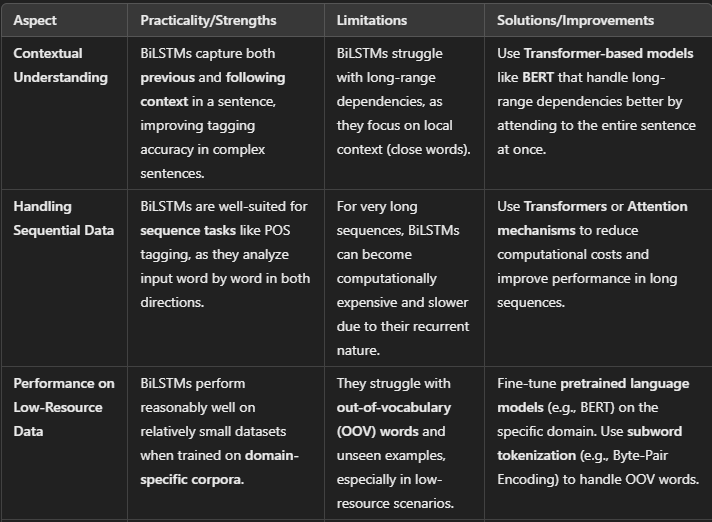

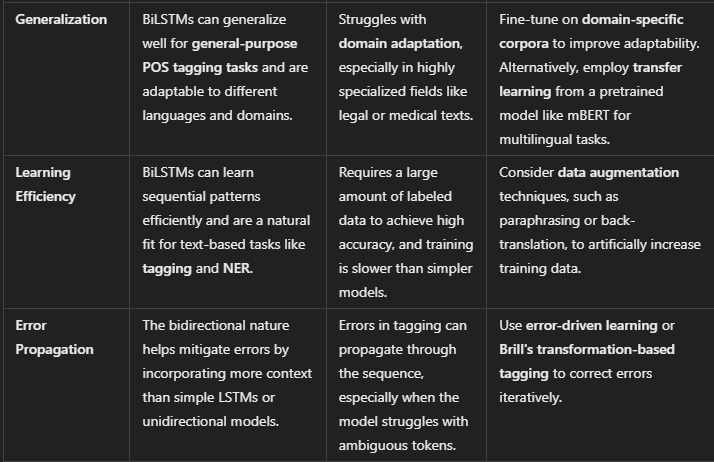

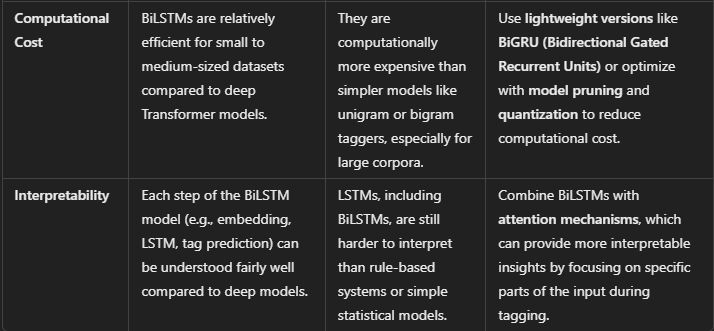



---



---



### **Demonstrations**



#### **Demonstration 1: Tagging a Specialized Corpus (e.g., Medical or Legal Text)**

In this demonstration, learners will apply a trained POS tagger to a **specialized domain** (e.g., medical, legal, or scientific text) and observe how well the model performs. The goal is to highlight the challenges of domain adaptation and out-of-vocabulary terms.



In [91]:
# Importing necessary libraries from NLTK (Natural Language Toolkit)
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import treebank
from nltk.metrics import accuracy
from collections import Counter
import matplotlib.pyplot as plt

# Download required NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [92]:
# Section 1: Use Treebank corpus
# Accessing tagged sentences from the Treebank corpus
treebank_sentences = treebank.tagged_sents()

# Display a sample sentence from the Treebank corpus with POS tags
print("Sample sentence from Treebank corpus with POS tags:")
print(treebank_sentences[0])



Sample sentence from Treebank corpus with POS tags:
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [93]:
# Section 2: Tokenizing and POS Tagging a New Sentence (similar to Treebank format)
# Let's take a sentence from Treebank for tagging
sentence = "The patient was diagnosed with hypertension and prescribed antihypertensive medication."

# Tokenizing the new sentence
tokens = word_tokenize(sentence)
print("\nTokenized words from new sentence:")
print(tokens)

# Applying the pre-trained Averaged Perceptron POS tagger to the tokenized sentence
tagged_text = pos_tag(tokens)
print("\nPOS Tagged output of new sentence:")
print(tagged_text)




Tokenized words from new sentence:
['The', 'patient', 'was', 'diagnosed', 'with', 'hypertension', 'and', 'prescribed', 'antihypertensive', 'medication', '.']

POS Tagged output of new sentence:
[('The', 'DT'), ('patient', 'NN'), ('was', 'VBD'), ('diagnosed', 'VBN'), ('with', 'IN'), ('hypertension', 'NN'), ('and', 'CC'), ('prescribed', 'JJ'), ('antihypertensive', 'JJ'), ('medication', 'NN'), ('.', '.')]


In [97]:
# Section 3: Evaluate the POS Tagger using Treebank corpus as a test set
# Here, we'll compare the predicted tags by our tagger against Treebank's actual tags

# Let's use a small subset of the Treebank corpus as the test set (first 10 sentences)
test_data = treebank.tagged_sents()[:10]

# Now we will create a predicted tag set using NLTK's pre-trained POS tagger (Averaged Perceptron)
predicted_tags = [pos_tag([word for word, tag in sentence]) for sentence in test_data]

# Flatten the predicted and true tags for evaluation
true_tags = [tag for sent in test_data for word, tag in sent]
predicted_tags_flat = [tag for sent in predicted_tags for word, tag in sent]

# Calculate the accuracy of the POS tagger using the Treebank test set
accuracy_score = accuracy(predicted_tags_flat, true_tags)
print(f"\nPOS Tagger Accuracy on Treebank Test Set: {accuracy_score:.2f}")




POS Tagger Accuracy on Treebank Test Set: 0.89


In [98]:
# Section 4: Display one example comparison between the actual Treebank tags and predicted tags
print("\nSample comparison of predicted vs actual POS tags for the first sentence:")
print("True Tags:", test_data[0])
print("Predicted Tags:", predicted_tags[0])




Sample comparison of predicted vs actual POS tags for the first sentence:
True Tags: [('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
Predicted Tags: [('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


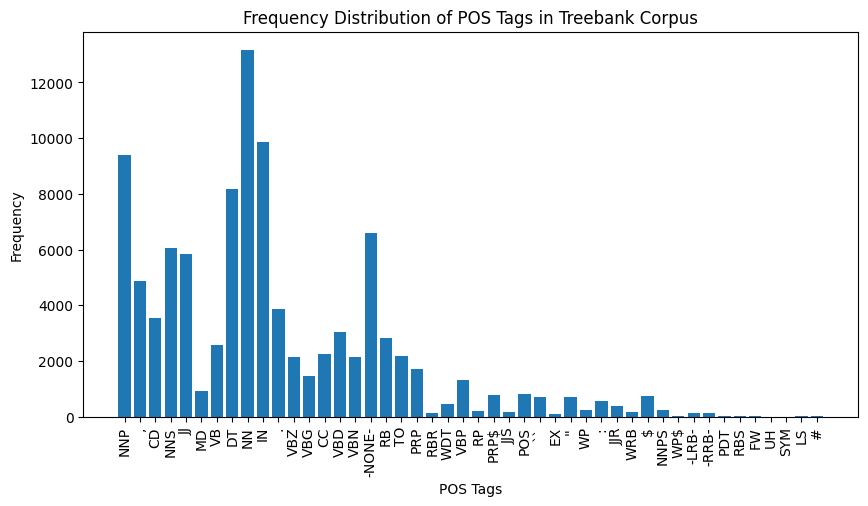

In [99]:
# Section 5: Visualizing POS Tag Frequencies in the Treebank Corpus
# Collect POS tags from the entire Treebank corpus to analyze frequency
all_tags = [tag for sent in treebank.tagged_sents() for word, tag in sent]
tag_freq = Counter(all_tags)

# Plot the POS tag frequencies using matplotlib
plt.figure(figsize=(10, 5))
plt.bar(tag_freq.keys(), tag_freq.values())
plt.xticks(rotation=90)
plt.title("Frequency Distribution of POS Tags in Treebank Corpus")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.show()



In [102]:
# Section 6: Analyze Uncommon Tags in Treebank
# Display the least common POS tags in the Treebank corpus
least_common_tags = tag_freq.most_common()[-5:]  # Get the 5 least common POS tags
print("\nLeast common POS tags in Treebank corpus:")
print(least_common_tags)




Least common POS tags in Treebank corpus:
[('WP$', 14), ('LS', 13), ('FW', 4), ('UH', 3), ('SYM', 1)]


In [103]:
# Section 7: Performance of POS Tagger on Different Sentence Structures
# Create a complex sentence to test the tagger's performance on sentence structure
complex_sentence = "Although the patient was stable, the doctor prescribed additional medication due to complications."

# Tokenize and tag the complex sentence
complex_tokens = word_tokenize(complex_sentence)
complex_tagged = pos_tag(complex_tokens)
print("\nPOS Tagged output of complex sentence:")
print(complex_tagged)




POS Tagged output of complex sentence:
[('Although', 'IN'), ('the', 'DT'), ('patient', 'NN'), ('was', 'VBD'), ('stable', 'JJ'), (',', ','), ('the', 'DT'), ('doctor', 'NN'), ('prescribed', 'VBD'), ('additional', 'JJ'), ('medication', 'NN'), ('due', 'JJ'), ('to', 'TO'), ('complications', 'NNS'), ('.', '.')]


In [104]:
# Section 8: Error Analysis on Treebank Subset
# Analyze where the tagger fails by comparing predictions to true tags
errors = [(pred, true) for pred, true in zip(predicted_tags_flat, true_tags) if pred != true]

# Print the first few errors
print("\nPOS Tagging Errors (Predicted vs True Tags):")
print(errors[:10])




POS Tagging Errors (Predicted vs True Tags):
[('NN', 'VBG'), ('JJ', '-NONE-'), ('VBD', 'VBN'), ('JJ', '-NONE-'), ('NN', '-NONE-'), ('RB', '-NONE-'), ('JJR', 'RBR'), ('RB', 'IN'), ('CD', '-NONE-'), ('NN', '-NONE-')]


In [105]:
# Section 9: POS Tagging for Custom Corpus (Real-World Text)
# Load a custom legal or medical text and demonstrate POS tagging
custom_text = """
The contract stipulates that any breach of agreement will result in immediate legal action.
"""
custom_tokens = word_tokenize(custom_text)
custom_tagged = pos_tag(custom_tokens)
print("\nPOS Tagged output of custom legal text:")
print(custom_tagged)



POS Tagged output of custom legal text:
[('The', 'DT'), ('contract', 'NN'), ('stipulates', 'VBZ'), ('that', 'IN'), ('any', 'DT'), ('breach', 'NN'), ('of', 'IN'), ('agreement', 'NN'), ('will', 'MD'), ('result', 'VB'), ('in', 'IN'), ('immediate', 'JJ'), ('legal', 'JJ'), ('action', 'NN'), ('.', '.')]


In [106]:
# Import additional libraries for advanced taggers and models
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger, DefaultTagger
from nltk.corpus import treebank
from nltk.metrics import ConfusionMatrix

# Section 10: Implement Unigram, Bigram, Trigram Taggers and Backoff Strategy

# Using a DefaultTagger as a fallback when more advanced taggers fail
default_tagger = DefaultTagger('NN')  # Defaulting to 'NN' (noun) for unknown words

# Unigram Tagger trained on Treebank
unigram_tagger = UnigramTagger(treebank.tagged_sents()[:3000], backoff=default_tagger)

# Bigram Tagger with Unigram backoff
bigram_tagger = BigramTagger(treebank.tagged_sents()[:3000], backoff=unigram_tagger)

# Trigram Tagger with Bigram backoff
trigram_tagger = TrigramTagger(treebank.tagged_sents()[:3000], backoff=bigram_tagger)

In [107]:
# Section 11: Test and Compare the Taggers on a Test Set
# Use the same test set from Treebank
test_sents = treebank.tagged_sents()[3000:3010]

# Evaluate each tagger separately
unigram_accuracy = unigram_tagger.evaluate(test_sents)
bigram_accuracy = bigram_tagger.evaluate(test_sents)
trigram_accuracy = trigram_tagger.evaluate(test_sents)

print(f"\nUnigram Tagger Accuracy: {unigram_accuracy:.2f}")
print(f"Bigram Tagger Accuracy: {bigram_accuracy:.2f}")
print(f"Trigram Tagger Accuracy: {trigram_accuracy:.2f}")


Unigram Tagger Accuracy: 0.83
Bigram Tagger Accuracy: 0.84
Trigram Tagger Accuracy: 0.85


<ipython-input-107-4986e2490404>:6: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  unigram_accuracy = unigram_tagger.evaluate(test_sents)
<ipython-input-107-4986e2490404>:7: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  bigram_accuracy = bigram_tagger.evaluate(test_sents)
<ipython-input-107-4986e2490404>:8: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  trigram_accuracy = trigram_tagger.evaluate(test_sents)


In [108]:
# Section 12: Confusion Matrix for Error Analysis on the Best Performing Tagger (Trigram)
# Flatten the predicted and true tags for confusion matrix comparison
predicted = [tag for sent in trigram_tagger.tag_sents([[word for word, tag in sent] for sent in test_sents]) for word, tag in sent]
true = [tag for sent in test_sents for word, tag in sent]

# Create and print confusion matrix
cm = ConfusionMatrix(true, predicted)
print("\nConfusion Matrix for Trigram Tagger:")
print(cm)



Confusion Matrix for Trigram Tagger:
       |        -                                                                   |
       |     -  N  -                                                                |
       |     L  O  R                                         P                      |
       |     R  N  R                       J     N  N  P  P  R        V  V  V  V  W |
       |     B  E  B     C  C  D  E  I  J  J  N  N  N  O  R  P  R  T  B  B  B  B  D |
       |  ,  -  -  -  .  C  D  T  X  N  J  R  N  P  S  S  P  $  B  O  D  G  N  Z  T |
-------+----------------------------------------------------------------------------+
     , |<18> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
 -LRB- |  . <1> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
-NONE- |  .  .<12> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
 -RRB- |  .  .  . <1> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
     . |  .  .  

In [109]:

# Section 13: Compare Pre-Trained Averaged Perceptron Tagger with Trigram Tagger
# We already have the test set and its true labels from previous examples

# Predict using Averaged Perceptron Tagger
averaged_perceptron_pred = [tag for sent in [pos_tag([word for word, tag in sent]) for sent in test_sents] for word, tag in sent]

# Calculate accuracy for the Averaged Perceptron Tagger
averaged_perceptron_accuracy = accuracy(averaged_perceptron_pred, true)
print(f"\nAveraged Perceptron Tagger Accuracy: {averaged_perceptron_accuracy:.2f}")



Averaged Perceptron Tagger Accuracy: 0.92


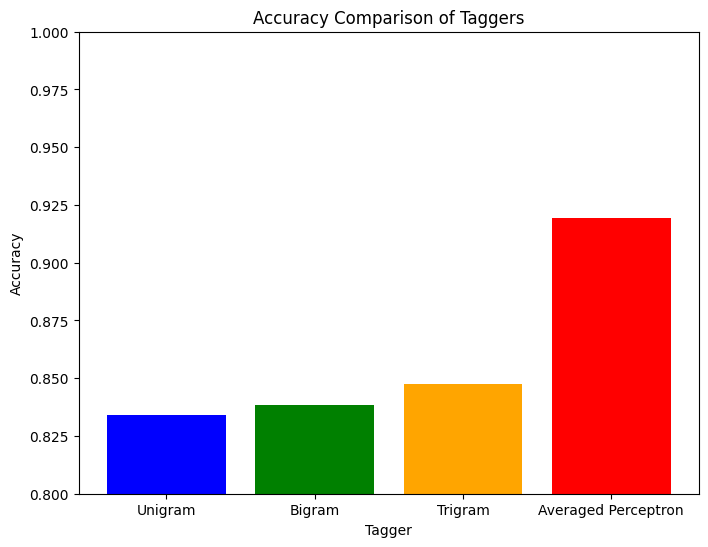

In [110]:
# Section 14: Compare Accuracy of all Taggers in a Single Plot
# Plot accuracy scores of Unigram, Bigram, Trigram, and Averaged Perceptron taggers
import matplotlib.pyplot as plt

tagger_names = ['Unigram', 'Bigram', 'Trigram', 'Averaged Perceptron']
accuracies = [unigram_accuracy, bigram_accuracy, trigram_accuracy, averaged_perceptron_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(tagger_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.8, 1.0)
plt.title('Accuracy Comparison of Taggers')
plt.xlabel('Tagger')
plt.ylabel('Accuracy')
plt.show()
